# Projet: Optimisation numérique et science des données
> Developed by Patrik Rác

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 1: Optimisation numérique et science des données

### Question 1
In this Exerxise we will try to reduce noise of an signal by the means of the gradient method.
For this purpose we consider a noisy signal $(y_i)_{i=1,...,N}$ measured at times $(t_i)_{i=1,...,N}$.
We are aiming to find a smooth signal $(x_i)_{i=1,...,N}$ that minimizes the following cost function:

$$f(x) = \frac{1}{2}\sum_{i = 1}^{N}(x_i - y_i)^2 + \frac{\lambda}{2}\sum_{i = 1}^{N-1}(x_{i+1} - x_i)^2$$

This an also be rewritten in the form:

$$f(x) = \frac{1}{2}||x-y||^2 + \frac{\lambda}{2}||Dx||^2$$

where the $N \times N$ matrix $D$ is defined as:

$$D = \begin{pmatrix}
-1 & 1 & 0 & \dots & 0 \\
0 & -1 & 1 &  & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & & -1 & 1 \\
0 & 0 & 0 & \dots & 0
\end{pmatrix}$$

In the following we will implement a funciton that assembles this matrix.

In [2]:
def D_mat(N):
    return np.diag(np.ones(N - 1), k=1) - np.diag(np.block([np.ones(N - 1), 0]), k=0)

### Question 2
After verifying that $f$ is indeed a differentiable function we can compute its derivative:
\begin{align*}
f(x+h) &= \frac{1}{2} (x+h-y, x+h-y) + \frac{\lambda}{2} (D(x+h), D(x+h)) \\
        &= \frac{1}{2} (x-y, x+h-y) + \frac{1}{2} (h, x+h-y) + \frac{\lambda}{2} (Dx, D(x+h)) + \frac{\lambda}{2} (Dh, D(x+h))  \\
        &= \frac{1}{2} (x-y, x-y) + \frac{1}{2} (x-y, h) + \frac{1}{2} (h,x-y) + \frac{1}{2} (h,h) + \frac{\lambda}{2} (Dx, Dx) + \frac{\lambda}{2} (Dx, Dh) + \frac{\lambda}{2} (Dh, Dx) + \frac{\lambda}{2} (Dh, Dh) \\
        &= f(x) + (x-y+D^TDx, h) + o(||h||) \\
\end{align*}
And thus the gradient of $f$ is given by:
$$\nabla f(x) = x-y+D^TDx$$

We can now implement function computing the value of $f$ and the value of its gradient.

In [3]:
def compute_f(x, D, y, l):
    return 1. / 2. * np.sum((x - y) ** 2) + l / 2. * np.sum(D.dot(x) ** 2)


def compute_grad_f(x, D, y, l):
    return x - y + l * D.T.dot(D.dot(x))

### Question 3
Using the given function we will generate a noisy signal and display it. We will choose the number of points $N = 100$.
In the following questions we will then try to smooth this signal by using different gradient methods.

In [4]:
def generate_signal(N, sigma=0.05):
    t = np.linspace(0, 1, N)
    t1 = 0.1 + 0.25 * np.random.random()
    t2 = 0.35 + 0.25 * np.random.random()

    yi = np.array([-0.1, 0.8, 0.2])
    y = np.zeros(N)
    for i in range(y.size):
        if t[i] <= t1:
            y[i] = yi[0]
        elif t[i] > t1 and t[i] <= t2:
            y[i] = yi[1]
        else:
            y[i] = yi[2]

    y += sigma * (2 * np.random.random(y.size) - 1)
    return t, y

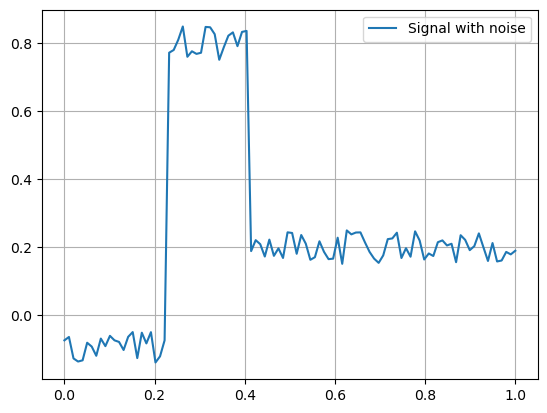

In [5]:
# Set the number of points
N = 100
# Generate the signal
signal = generate_signal(N)

plt.plot(signal[0], signal[1], label='Signal with noise')
plt.legend()
plt.grid()
plt.show()

### Question 4
In the following we will implement a fixed step gradient method.
In particular this means that we will follow the following iteration:
$$x_{k+1} = x_{k} - \alpha \nabla f(x_{k})$$
using a given Python function for the gradient $\nabla f(x)$ and a fixed $\alpha$ that is choosen by the user and will define the fixed step.
We will stop the iteration after either a certain maximum amount of iteration or after the difference between two subsequent iterations is smaller than a given $\varepsilon$.

In [6]:
def gradient_met(grad_f, x0, alpha, eps, Nmax):
    # Set the error to an initially larger value
    e = 2. * eps
    # Set the number of iterations to 0
    n = 0
    # Set the initial value of x
    x = x0

    while n < Nmax and e > eps:
        # Compute the gradient
        g = grad_f(x)
        # Compute the new x
        x_new = x - alpha * g
        # Compute the error
        e = np.linalg.norm(x_new - x)
        # Update x
        x = x_new
        # Increment the number of iterations
        n += 1

    # Check for convergence
    if e < eps:
        cvg = True
    else:
        cvg = False

    return x, n, cvg

### Question 5
We now use the above implemented fixed step gradient method in order to smooth the noisy signal.
By choosing $\lambda = 1$ and $\alpha = 0.1$ we obtain the following result:

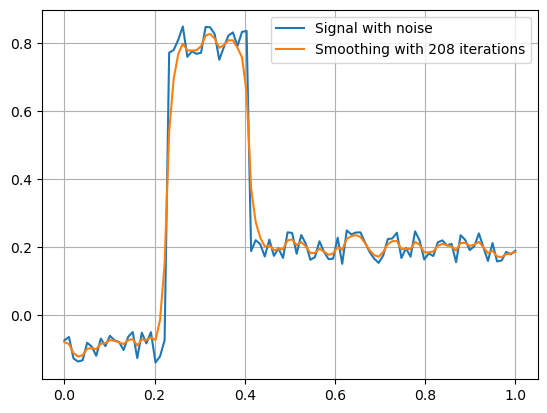

Convergence of the gradient method:  Succeeded  with  208  iterations


In [7]:
plt.plot(signal[0], signal[1], label='Signal with noise')

smooth_signal, it, c = gradient_met(lambda x: compute_grad_f(x, D=D_mat(N),
                                                             y=signal[1], l=1), signal[1], 0.1, 1e-12, 1000)


plt.plot(signal[0], smooth_signal, label='Smoothing with ' + str(it) + ' iterations')
plt.legend()
plt.grid()
plt.show()

print("Convergence of the gradient method: ", "Succeeded" if c else "Failed", " with ", it, " iterations")

### Question 6
We see that the previous choice of $\alpha$ was sufficient in order to obtain a relatively smooth signal.
We will now consider values of $\lambda = 1$ and $\alpha = 0.5$.
As seen in the plot below we are not converging towards the proper signal. In fact, we are not converging at all and rather exploding towards an incorrect solution.
In particular, we are dealing with a too large step size such that the fixed step gradient method is not able to converge.


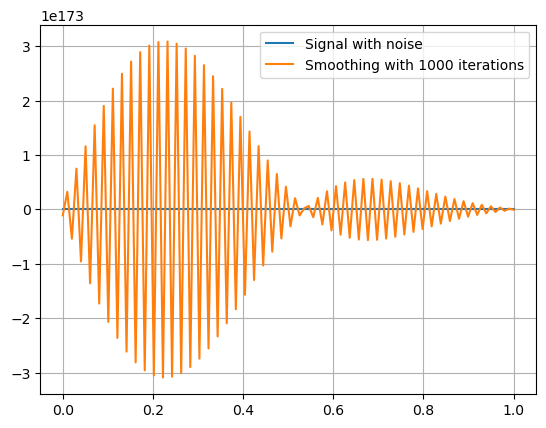

Convergence of the gradient method:  Failed  with  1000  iterations


In [8]:
plt.plot(signal[0], signal[1], label='Signal with noise')

smooth_signal, it, c = gradient_met(lambda x: compute_grad_f(x, D=D_mat(N),
                                                             y=signal[1], l=1), signal[1], 0.5, 1e-9, 1000)


plt.plot(signal[0], smooth_signal, label='Smoothing with ' + str(it) + ' iterations')
plt.legend()
plt.grid()
plt.show()

print("Convergence of the gradient method: ", "Succeeded" if c else "Failed", " with ", it, " iterations")

### Question 7
We now consider values ranging from $\lambda = 1,...,4$ by step of 1. We will then plot the resulting smoothed signals.
In particular, we observe an increasingly smooth function as we increase $\lambda$ to $4$, which is defenitely an expected result.
We can  also observe that the iterations required to converge are very similar, although slightly increasing with $\lambda$.

Convergence of the gradient method with lambda = 1 :  Succeeded  with  144  iterations
Convergence of the gradient method with lambda = 2 :  Succeeded  with  146  iterations
Convergence of the gradient method with lambda = 3 :  Succeeded  with  147  iterations
Convergence of the gradient method with lambda = 4 :  Succeeded  with  147  iterations


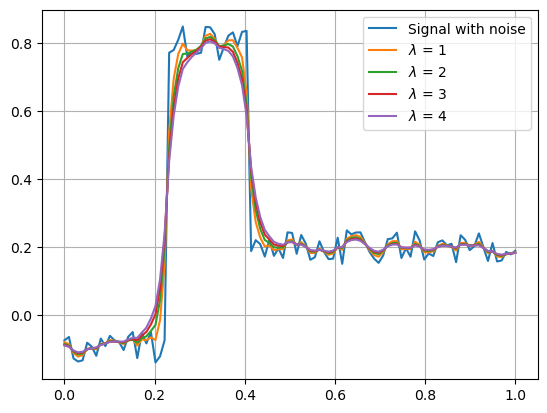

In [9]:
plt.plot(signal[0], signal[1], label='Signal with noise')

for l in [1,2,3,4]:
    smooth_signal, it, c = gradient_met(lambda x: compute_grad_f(x, D=D_mat(N),
                                                                 y=signal[1], l=l), signal[1], 0.1, 1e-9, 1000)
    print("Convergence of the gradient method with lambda =",l, ": ", "Succeeded" if c else "Failed", " with ", it, " iterations")

    plt.plot(signal[0], smooth_signal, label='$\lambda$ = ' +str(l))

plt.legend()
plt.grid()
plt.show()

### Question 8
As mentioned before the obtained smooth signal still very much resembles the noisy signal, thus not really capturing the underlying initial signal. In order to resolve this issue we will now consider a new function.
We now define a new function $f_\mu$ and define a function that computes its gradient $\nabla f_\mu$.
The new function is defined as follows:
$$f_\mu(x) = \frac{1}{2} \sum_{i=1}^{N}(x_i - y_i)^2 + \lambda \sum_{i=1}^{N-1}\sqrt{(x_{i+1} - x_{i})^2 + \mu^2}$$
In fact the first term of the function (and thus also of its derivative) is identical and thus we will only need to compute the derivative of the second term, which we will denote $g_\mu(x)$.
Hence we have:
$$g_\mu(x) = \lambda \sum_{i=1}^{N-1}\sqrt{(x_{i+1} - x_{i})^2 + \mu^2}$$
We can now compute the derivative of $g_\mu(x)$ by computing its partial derivatives with respect to each $x_i$.
$$\frac{\partial}{\partial x_i} g_\mu(x) = \lambda (\frac{(x_i - x_{i-1})}{\sqrt{(x_i - x_{i-1})^2 + \mu^2}} - \frac{(x_{i+1} - x_{i})}{\sqrt{(x_{i+1} - x_{i})^2 + \mu^2}})$$
Which can be rewritten using the substitution $z_i = \frac{(x_{i+1} - x_{i})}{\sqrt{(x_{i+1} - x_{i})^2 + \mu^2}}$ as
$$\frac{\partial}{\partial x_i} g_\mu(x) = z_{i-1} - z_i$$
which conveniantly is the same as multiplying the vector $z$ by $D^T$.

Ultimately we in particular follow:
$$\nabla g_\mu(x) = D^Tz$$
where $D$ is the matrix defined in question 1 and $(z_i)_{i=1,...,N-1} = \frac{(x_{i+1} - x_{i})}{\sqrt{(x_{i+1} - x_{i})^2 + \mu^2}}$

In [10]:
def compute_grad_f_mu(x, D, y, l, mu):
    return x - y + l * D.T.dot(D.dot(x) / np.sqrt(D.dot(x) ** 2 + mu ** 2))

### Question 9
Using the fixed step gradient method we will now minimize this new cost function (using $\mu = 0.01$). In order to obtain good resluts in this case however, we need to adjust our fixed step size. As even our previous step size of $0.01$ was too large. The results are shown below with a used step size of $\alpha = 0.005$.
As a result we see a signal much closer to the initial one than in the previous case. However we also see a large increase in the number of iterations needed to converge to the solution.

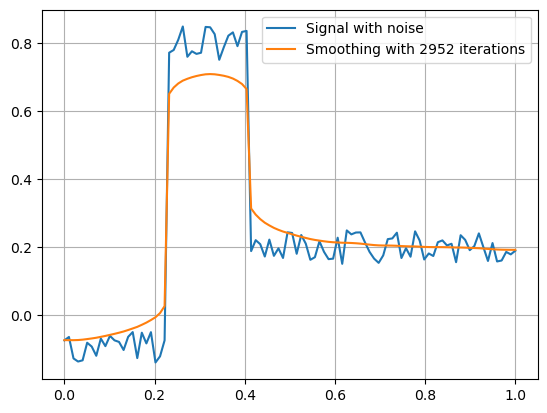

Convergence of the gradient method with mu:  Succeeded  with  2952  iterations


In [11]:
plt.plot(signal[0], signal[1], label='Signal with noise')

smooth_signal_mu, it_mu, c_mu = gradient_met(lambda x: compute_grad_f_mu(x, D=D_mat(N),
                                                                          y=signal[1], l=1, mu=0.01),
                                             signal[1], 0.005, 1e-9, 10000)

plt.plot(signal[0], smooth_signal_mu, label='Smoothing with ' + str(it_mu) + ' iterations')
plt.legend()
plt.grid()
plt.show()

print("Convergence of the gradient method with mu: ", "Succeeded" if c_mu else "Failed", " with ", it_mu, " iterations")

### Question 10
In order to provide faster convergence of the method we obviously have to introduce a variable step size. In particular, we will now use the Barzilai-Borwein method.
Thus we will select the step
$$\alpha_k = \frac{(\nabla g_k, \nabla x_k)}{||\nabla g_k||^2}$$
where $\nabla x_k = x_k - x_{k-1}$ and $\nabla g_k = \nabla f(x_k) - \nabla f(x_{k-1})$.
As this method needs two initialization points we set $x_{-1} = -x_0$
We now implement the Barzilai-Borwein method.

In [12]:
def BBstep(grad_f, x, xm1):
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization point x_0
    xm1 the initialization point x_-1
    """

    delta_x = x - xm1
    delta_g = grad_f(x) - grad_f(xm1)

    # The deltas are flattend in order to work with matrix valued input (e.g. smoothing an image)
    bbs = np.dot(delta_g.flat, delta_x.flat) / np.dot(delta_g.flat, delta_g.flat)
    return bbs


def barzilai_borwein(grad_f, x0, eps, Nmax):
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    # Set the error to an initially larger value
    e = 2. * eps
    # Set the number of iterations to 0
    n = 0
    # Set the initial value of x = x0 and xm = -x0
    x = x0
    xm = -x0

    while n < Nmax and e > eps:
        # Compute the gradient
        g = grad_f(x)
        # Compute the step
        alpha = BBstep(grad_f, x, xm)
        xm = x
        # Compute the new x
        x = x - alpha * g
        # Compute the error
        e = np.linalg.norm(x - xm)
        # Increment the number of iterations
        n += 1

    # Check for convergence
    if e < eps:
        cvg = True
    else:
        cvg = False

    return x, n, cvg

Consequently, we will use this new method to minimize the cost function. The results are shown below.
In particular, we observe a much faster convergence of the method, taking far few iterations to converge to the same solution as the fixed step gradient method.

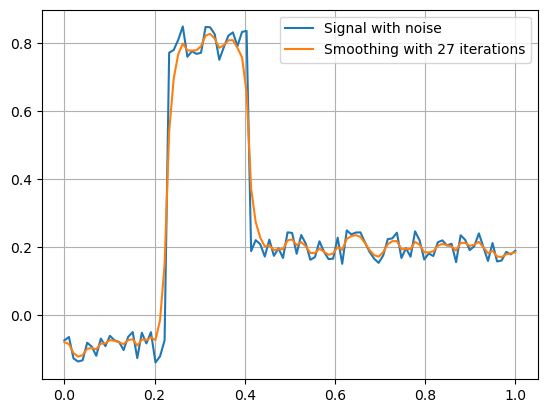

Convergence of the Barzilai-Borwein method:  Succeeded  with  27  iterations


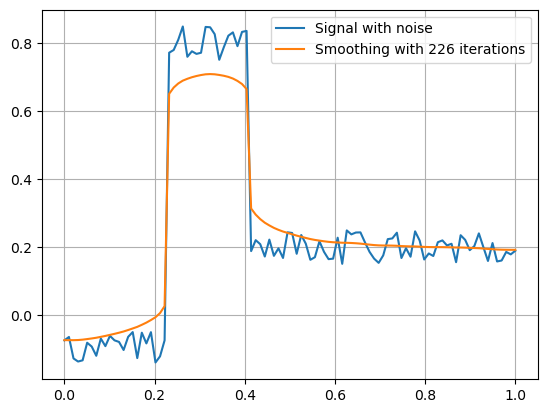

Convergence of the Barzilai-Borwein method:  Succeeded  with  226  iterations


In [13]:
# Minimize the cost function
plt.plot(signal[0], signal[1], label='Signal with noise')

smooth_signal_bb, it_bb, c_bb = barzilai_borwein(lambda x: compute_grad_f(x, D=D_mat(N),y=signal[1], l=1), signal[1], 1e-9, 1000)

plt.plot(signal[0], smooth_signal_bb, label='Smoothing with ' + str(it_bb) + ' iterations')
plt.legend()
plt.grid()
plt.show()

print("Convergence of the Barzilai-Borwein method: ", "Succeeded" if c_bb else "Failed", " with ", it_bb, " iterations")

# Minimize the cost function with mu
plt.plot(signal[0], signal[1], label='Signal with noise')

smooth_signal_bb_mu, it_bb_mu, c_bb_mu = barzilai_borwein(lambda x: compute_grad_f_mu(x, D=D_mat(N), y=signal[1], l=1, mu=0.01), signal[1], 1e-9, 1000)

plt.plot(signal[0], smooth_signal_bb_mu, label='Smoothing with ' + str(it_bb_mu) + ' iterations')
plt.legend()
plt.grid()
plt.show()

print("Convergence of the Barzilai-Borwein method: ", "Succeeded" if c_bb_mu else "Failed", " with ", it_bb_mu, " iterations")

## Exercise 2: Removing Noise from an image

We will now load the smaple image that will mainly be trated in the exercise. It shows the Mona Lisa.

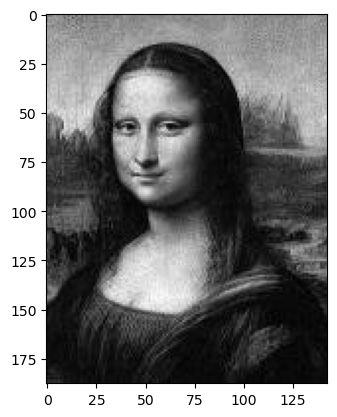

In [14]:
from matplotlib.image import imread

image = imread('Grey_Mona_lisa.jpg')
# convert to array
imageArray = np.asarray(image, dtype=np.float64)[:, :, 0].copy()/255.
# display the image
plt.imshow(imageArray, cmap='gray')
plt.show()
g = imageArray.copy()

### Question 1
We will use the techniques and methods implemented in Exercise 1 in order to remove the noise from an image. For this purpose we define an image $u \in \mathbb{R}^{m\times n}$ and its discrete gradient $\nabla^d u = (u_x, u_y) \in \mathbb{R}^{m\times n} \times \mathbb{R}^{m\times n}$.

We will implement functions that will compute the derivatives in each direction using finite differences.
We will then display the gradients applied to the Mona Lisa. We here observe the change in pixel values in both x- and y-directions.

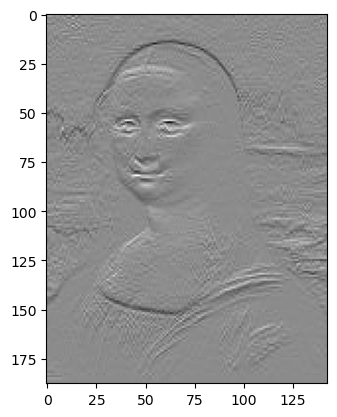

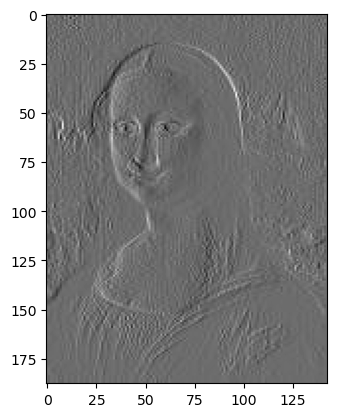

In [15]:
def discrete_gradient_x(img):
    (m, n) = img.shape
    grad_x = np.zeros((m, n))
    # Compute x_{i+1,j} - x_{i, j}
    grad_x[:, :] = np.block([[img[1:, :] - img[:-1, :]], [np.zeros((1, n))]])
    return grad_x


def discrete_gradient_y(img):
    (m, n) = img.shape
    grad_y = np.zeros((m, n))
    # Compute x_{i,j+1} - x_{i, j}
    grad_y[:, :] = np.block([img[:, 1:] - img[:, :-1], np.zeros((m, 1))])
    return grad_y

grad_x = discrete_gradient_x(g)
plt.imshow(grad_x, cmap='gray')
plt.show()
grad_y = discrete_gradient_y(g)
plt.imshow(grad_y, cmap='gray')
plt.show()

### Question 2
We will now compute the norm of the discrete gradient defined as
$$M_{i,j} = \sqrt{(u_x)^2_{i,j} + (u_y)^2_{i,j}}$$
This metric gives a measure of the change in pixel values in both directions. We will display the result below.
We can see that next to the edges of the main features of the mona lisa we have some noise in areas where ther is no subject. Using our implementations from Exercise 1 we will consequently try to smooth the image.

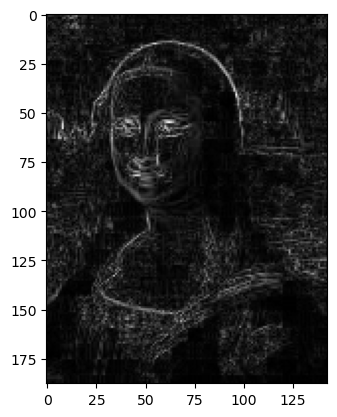

In [16]:
def discrete_gradient_norm(img):
    grad_x = discrete_gradient_x(img)
    grad_y = discrete_gradient_y(img)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

M = discrete_gradient_norm(g)
plt.imshow(M, cmap='gray')
plt.show()

### Question 3
We will now define the minimization problem used to smoothen the image. The function
$$J(v) = \frac{1}{2} ||v-g||^2 + \frac{\lambda}{2}||\nabla^d v||^2$$
will be minimized with respect to $v$.
$$\min_{v\in\mathbb{R}^{m\times n}} J(v)$$
To this end we need to compute the gradient of $J$ with respect to $v$. In particular, the function $\nabla J(v): \mathbb{R}^{m\times n} \rightarrow \mathbb{R}^{m\times n}$.
In particular, we can, similar as for exercise 1, write the function as
$$J(v) = \frac{1}{2}f(v) + \frac{\lambda}{2}g(v)$$
where $f(v) =||v-g||^2$ and its gradient is given similarly to above by $\nabla f(v) = 2(v-g)$.
Thus it only remains to compute the gradient of $g(v) = ||\nabla^d v||^2$.

Using the definition of the discrete gradient we can write, using the Frobenius norm,
$$g(v) = \sum_{i,j} (\delta_x)^2_{i,j} + (\delta_y)^2_{i,j} = \sum_{i,j} (v_{i+1,j} - v_{i,j})^2 + (v_{i,j+1} - v_{i,j})^2$$
We can now use this formulation to compute the partial derivatives of $g$ with respect to $v$.
$$\frac{\partial}{\partial v_{i,j}} g(v) = -2(v_{i+1,j} - v_{i,j}) - 2(v_{i,j+1} - v_{i,j}) + 2(v_{i,j} - v_{i,j-1}) + 2(v_{i,j} - v_{i-1,j})$$

When respecting the proper boundary values, the gradient $\nabla g(v)$ follows.


Convergence of the gradient method with lambda= 1 :  Succeeded  with  325  iterations
Convergence of the gradient method with lambda= 2 :  Succeeded  with  329  iterations
Convergence of the gradient method with lambda= 3 :  Succeeded  with  330  iterations
Convergence of the gradient method with lambda= 4 :  Succeeded  with  332  iterations


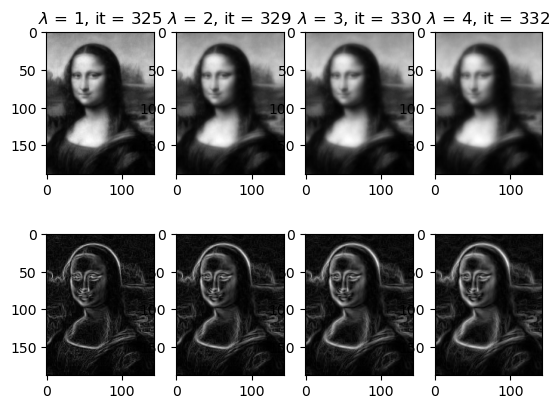

In [32]:
def compute_grad_J(x, g, l):
    (m, n) = x.shape
    grad_x_t = np.zeros((m, n))
    # Compute x_{i,j} - x_{i-1, j}
    grad_x_t[:, :] = np.block([[np.zeros((1, n))], [x[1:, :] - x[:-1, :]]])
    grad_y_t = np.zeros((m, n))
    # Compute x_{i,j} - x_{i, j-1}
    grad_y_t[:, :] = np.block([np.zeros((m, 1)), x[:, 1:] - x[:, :-1]])

    return x - g + l * ((grad_x_t + grad_y_t) - (discrete_gradient_x(x) + discrete_gradient_y(x)))

# Reduce the noise for different values of lambda
for l in [1, 2, 3, 4]:
    x, it, c = gradient_met(lambda x: compute_grad_J(x, g=g, l=l), g, 0.05, 1e-9, 10000)
    print("Convergence of the gradient method with lambda =",l, ": ", "Succeeded" if c else "Failed", " with ", it, " iterations")

    plt.subplot(2, 4, l)
    plt.title("$\lambda$ = " + str(l) + ", it = " + str(it))
    plt.imshow(x, cmap='gray')

    plt.subplot(2, 4, l + 4)
    plt.imshow(discrete_gradient_norm(x), cmap='gray')

plt.show()

We can now clearly see a way smoother image. In particular, the smoothing removes any sharp chages in pixel values and thus leads to a seemingly blurry image. Additionally, a lot of detail is lost in the process. Especially with an increase in $\lambda$ we see an even smoother result as it already was the case in the previous exercise.
When we look at the norm of the discrete gradient we can see that the noise is reduced significantly. However, the edges of the main features are still visible. This is due to the fact that the discrete gradient is still quite large in these areas.

### Question 4
We will now introduce a new function $J_\mu$ that will play a similar role as the function $f_\mu$ in the previous exercise.
$$J_\mu(v) = \frac{1}{2} f(v) + \lambda g_\mu(v)$$
with
$$g_\mu(v) = \sum_{i,j} \sqrt{(\delta_x)_{i,j}^2 + (\delta_y)_{i,j}^2 + \mu^2}$$

The derivative follows again by looking at the partial derivatives. Howerver, in this case it requires a bit more attention
$$\frac{\partial}{\partial v_{i,j}} g_\mu(v) = \frac{-(v_{i+1,j} - v_{i,j}) - (v_{i,j+1} - v_{i,j})}{\sqrt{(v_{i+1,j} - v_{i,j})^2 + (v_{i,j+1} - v_{i,j})^2 + \mu^2}} + \frac{v_{i,j} - v_{i,j-1}}{\sqrt{(v_{i+1,j-1} - v_{i,j-1})^2 + (v_{i,j} - v_{i,j-1})^2 + \mu^2}} + \frac{v_{i,j} - v_{i-1,j}}{\sqrt{(v_{i,j} - v_{i-1,j})^2 + (v_{i-1,j+1} - v_{i-1,j})^2 + \mu^2}}$$

This again results in the formulation of the gradient $\nabla g_\mu(v)$ when the boundary values are respected properly.

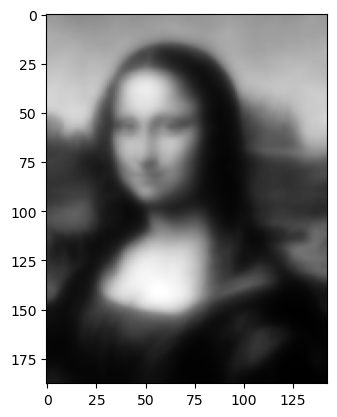

Convergence of the BB method:  Succeeded  with  74  iterations


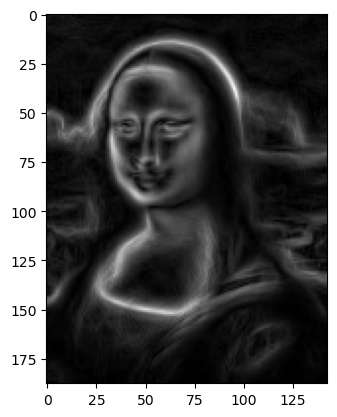

In [18]:
def compute_grad_J_mu(x, g, l, mu):
    (m, n) = x.shape
    grad_x = discrete_gradient_x(x)
    grad_x_t = np.zeros((m, n))
    # Compute x_{i,j} - x_{i-1, j}
    grad_x_t[:, :] = np.block([[np.zeros((1, n))], [x[1:, :] - x[:-1, :]]])
    grad_y = discrete_gradient_y(x)
    grad_y_t = np.zeros((m, n))
    # Compute x_{i,j} - x_{i, j-1}
    grad_y_t[:, :] = np.block([np.zeros((m, 1)), x[:, 1:] - x[:, :-1]])

    # Compute the gradient where we also directly compute (x_{i+1,j-1} - x_{i,j-1}) and (x_{i-1,j+1} - x_{i-1,j})
    return x - g + l * ((grad_x_t / np.sqrt(grad_x_t**2 + np.block([[np.zeros((1, n))], [x[:-1, 1:] - x[:-1, :-1], np.zeros((m-1, 1))]])**2 + mu**2)) + (grad_y_t / np.sqrt(grad_y_t**2 + np.block([[np.zeros((m-1, 1)), x[1:, :-1] - x[:-1, :-1]], [np.zeros((1,n))]])**2 + mu**2)) - (grad_x + grad_y) / np.sqrt(grad_x**2 + grad_y**2 + mu**2))

# Reduce the noise using the BB method (fixed step gradient method takes too many iterations and difficult choice of step size)
x_mu, it_mu, c_mu = barzilai_borwein(lambda x: compute_grad_J_mu(x, g=g, l=1, mu=0.1), g, 1e-6, 1000)

plt.imshow(x_mu, cmap='gray')
plt.show()
print("Convergence of the BB method: ", "Succeeded" if c_mu else "Failed", " with ", it_mu, " iterations")

M = discrete_gradient_norm(x_mu)
plt.imshow(M, cmap='gray')
plt.show()

We can see an even smoother image than before. Additionally, increasing the $\mu$ value will increase the "smoothness" obtained. This comes down to the fact that a lot of the detail in the picutre is removed as it is indistinguishable from real noise.
As there is not much real noise in the given original Mona Lisa picture we are not really seeing an advantage in using this method. In the following however, we will see that this method is very useful when it comes to denoising images with a lot of noise.

### Question 5
We will now consider a different image that is going to be used to test the methods implemented in this exercise.
We will use the following picture of a bird and display the image and the discrete gradient norm of the image.

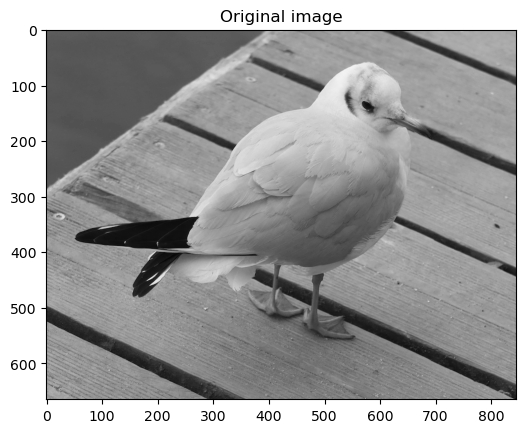

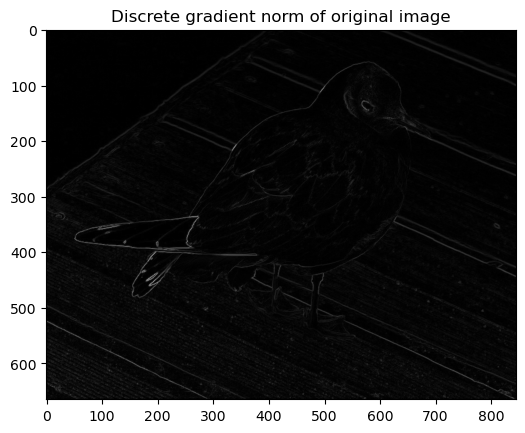

In [19]:
bird = imread('bird.jpg')

# convert to array
birdArray = np.asarray(bird, dtype=np.float64)[:, :, 0].copy()/255.

g_bird = birdArray.copy()

plt.imshow(g_bird, cmap='gray')
plt.title('Original image')
plt.show()

plt.imshow(discrete_gradient_norm(g_bird), cmap='gray')
plt.title('Discrete gradient norm of original image')
plt.show()

We will now continue to add gaussian white noise to the picture and will displpay the noisy image with its discrete gradient norm.
The noise is added by using the numpy function `np.random.randn(m,n)` which returns a matrix of size $m \times n$ with random values from a normal distribution with mean 0 and variance 1. We will then multiply this matrix with a factor $\sigma$ to control the amount of noise added. We choose a value of $\sigma = 0.5$, but it can be changed to observe the effects for different noise levels. In order to save performance and clearity of the notebook we will not display the noisy image for different values of $\sigma$.

In the discrete gradient norm we can see that the noise is very present and that the image is not very clear anymore. In the display of the norm we do not retain the subject of the image let alone any detail. We will now try to reduce the noise by using the methods implemented in this exercise.

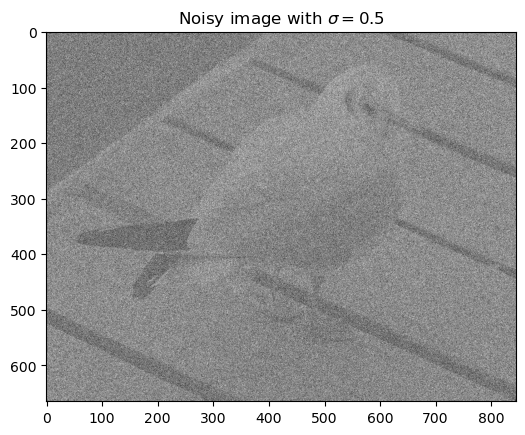

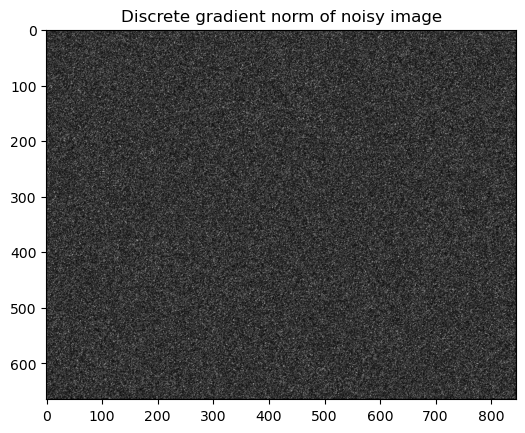

In [20]:
#Add some noise
sigma = 0.5
(m, n) = g_bird.shape
g_bird_noise = g_bird + sigma * np.random.randn(m,n)

plt.imshow(g_bird_noise, cmap='gray')
plt.title('Noisy image with $\sigma = 0.5$')
plt.show()

plt.imshow(discrete_gradient_norm(g_bird_noise), cmap='gray')
plt.title('Discrete gradient norm of noisy image')
plt.show()

In the first approach we will use the smoothing with minimizing the function $J(v)$. For the entirety of this question we will use the Barzilai-Borwein method to minimize the functions.

We see that with this functino the noise could be removed by quite an amount and the discrete gradient norm, while still not very clear, is much more recognizable than before.

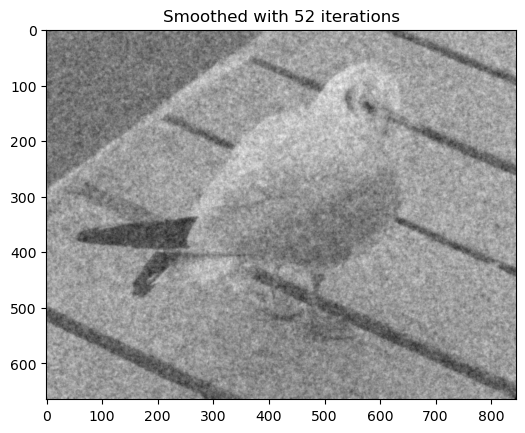

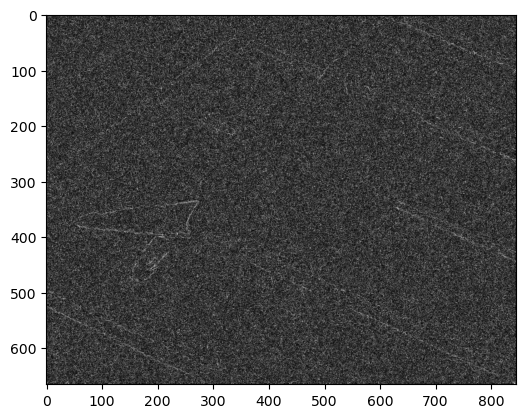

In [21]:
x_bird, it_bird, c_bird = barzilai_borwein(lambda x: compute_grad_J(x, g=g_bird_noise, l=3), g_bird_noise, 1e-6, 10000)

plt.imshow(x_bird, cmap='gray')
plt.title("Smoothed with " + str(it_bird) + " iterations")
plt.show()

plt.imshow(discrete_gradient_norm(x_bird), cmap='gray')
plt.show()

We will now try to use the smoothing with the function $J_\mu(v)$ to see if we can get an even better result. In particular we will use a $\mu=0.01$.

As expected this method takes significantly longer to converge, however, also results in an image that removes most of the noise from the noisy image. The discrete gradient norm also only shows the subject and no noise anymore. While we are able to remove most of the noise from the image we are still retrieving a very blurry version of our original image as a result of the smoothing

Convergence of the BB method:  Succeeded  with  708  iterations


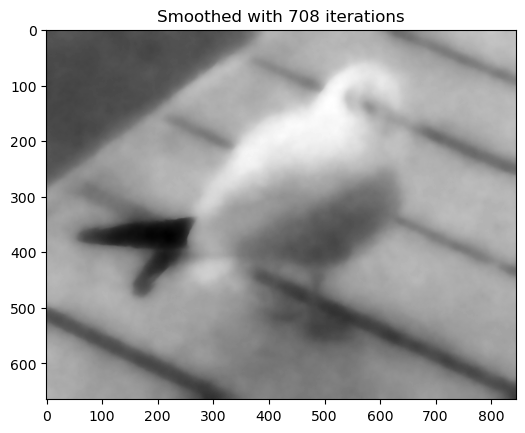

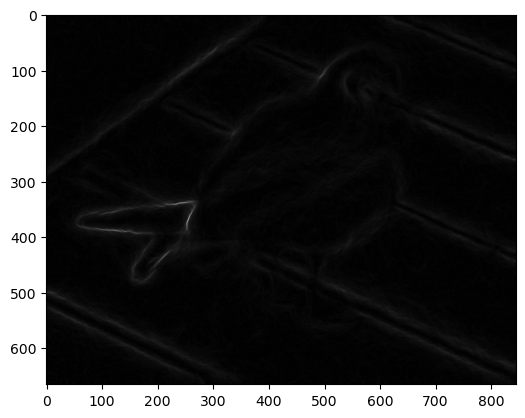

In [22]:
x_bird_mu, it_bird_mu, c_bird_mu = barzilai_borwein(lambda x: compute_grad_J_mu(x, g=g_bird_noise, l=3, mu=0.01), g_bird_noise, 1e-6, 10000)
print("Convergence of the BB method: ", "Succeeded" if c_bird_mu else "Failed", " with ", it_bird_mu, " iterations")
plt.imshow(x_bird_mu, cmap='gray')
plt.title("Smoothed with " + str(it_bird_mu) + " iterations")
plt.show()
plt.imshow(discrete_gradient_norm(x_bird_mu), cmap='gray')
plt.show()

We are now trying to quantify the differences between the initial image without noise and the results of both methods. In this scenario we will again use the discrete gradient norm that has been used before to use analyse the results of the smoothing.
In particular, we will define the error of the image as $||\nabla^d v_\text{initial} - \nabla^d v_\text{result}||$ and compare the values of the noisy image, the smoothing with $J(v)$ and the smoothing with $J_\mu(v)$

In [23]:
print("The error of the noisy image: ", np.linalg.norm(discrete_gradient_norm(g_bird_noise) - discrete_gradient_norm(g_bird)))

print("The error of the smoothed image with the function J(v): ", np.linalg.norm(discrete_gradient_norm(x_bird) - discrete_gradient_norm(g_bird)))

print("The error of the smoothed image with the function J_mu(v): ", np.linalg.norm(discrete_gradient_norm(x_bird_mu) - discrete_gradient_norm(g_bird)))

The error of the noisy image:  734.4933166514718
The error of the smoothed image with the function J(v):  55.14928272578558
The error of the smoothed image with the function J_mu(v):  30.75053463104505


We can see that the smoothing with both functions can significantly reduce the error. However, as we would expect, the image smoothed with the $J_\mu$ function is closer to the original image even though some detail is lost. This reflects the fact that the smoothing with the $J(v)$ function still retains some noise and doesn't manage to properly capure the initial signal as already analysed in Exercise 1.